What are the properties of the galaxies used to calibrate the TFR, and how do they compare to the overall SV sample and SGA?

In [3]:
from astropy.io import fits
from astropy.table import Table, join
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import Distance
import astropy.units as u
import astropy.constants as const

import numpy as np

import matplotlib.pyplot as plt

# Data

## TF catalog

In [2]:
hdul = fits.open('SGA_fuji_jointTFR-varyV0-perpdwarf-zCMB_dVsys_corr_moduli-20260114.fits')
SGA_TF = Table(hdul[1].data)
hdul.close()

## Calibrators

### Coma cluster

In [4]:
cluster_gals = Table.read('fuji_Coma_SGAids_calibration-20260114.txt', 
                          format='ascii.commented_header')
SGA_TF_clusters = join(cluster_gals, SGA_TF, keys='SGA_ID')

### 0pt calibrators

In [74]:
SGA_TF_0pt_gals = Table.read('SGA_distances_0pt_fuji_dVsys_corr.fits')

SGA_TF_0pt = join(SGA_TF_0pt_gals, SGA_TF['SGA_ID', 'Z_DESI_CMB'], keys='SGA_ID')

## SGA

In [6]:
# SGA = Table.read('/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits', 'ELLIPSE')
SGA = Table.read('/Users/kdouglass/Documents/Research/data/SGA/SGA-2020.fits', 'ELLIPSE')

# Galaxy size

## Apparent size

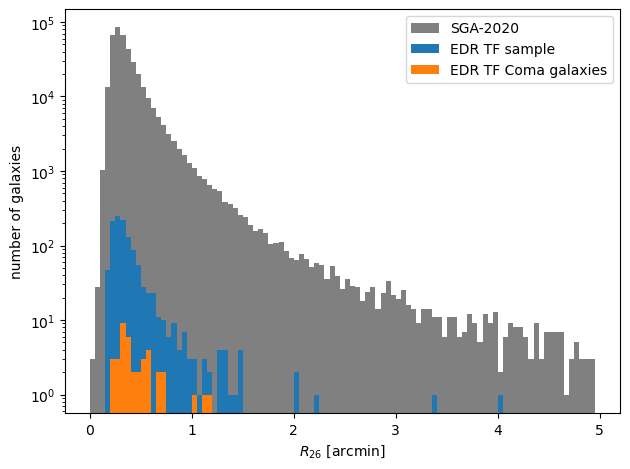

In [24]:
_R26_bins = np.arange(0, 5, 0.05) # arcmin

plt.figure(tight_layout=True)

# SGA
plt.hist(0.5*SGA['D26'], bins=_R26_bins, color='gray', label='SGA-2020')

# SV sample
plt.hist(0.5*SGA_TF['D26'], bins=_R26_bins, color='tab:blue', label='EDR TF sample')

# Coma
plt.hist(0.5*SGA_TF_clusters['D26'], bins=_R26_bins, color='tab:orange', label='EDR TF Coma galaxies')

plt.yscale('log')

plt.legend()

plt.xlabel('$R_{26}$ [arcmin]')
plt.ylabel('number of galaxies');

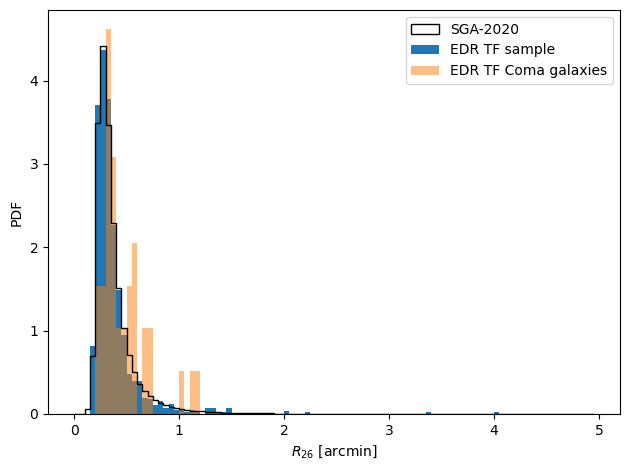

In [56]:
_R26_bins = np.arange(0, 5, 0.05) # arcmin

plt.figure(tight_layout=True)

# SGA
plt.hist(0.5*SGA['D26'], bins=_R26_bins, histtype='step', density=True, color='k', label='SGA-2020')

# SV sample
plt.hist(0.5*SGA_TF['D26'], bins=_R26_bins, density=True, color='tab:blue', label='EDR TF sample')

# Coma
plt.hist(0.5*SGA_TF_clusters['D26'], bins=_R26_bins, density=True, alpha=0.5, color='tab:orange', label='EDR TF Coma galaxies')

# plt.yscale('log')

plt.legend()

plt.xlabel('$R_{26}$ [arcmin]')
plt.ylabel('PDF');

### As a function of redshift

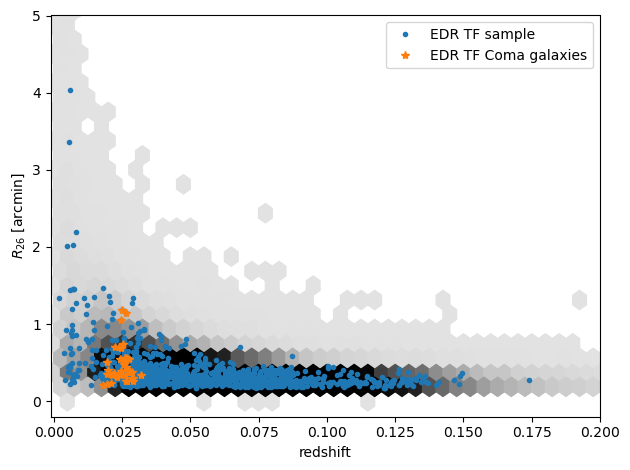

In [46]:
plt.figure(tight_layout=True)

# SGA
# plt.plot(SGA['Z_LEDA'], 0.5*SGA['D26'], '.', c='gray', alpha=0.2, label='SGA')
plt.hexbin(SGA['Z_LEDA'], 0.5*SGA['D26'], 
           mincnt=1, 
           vmin=-500, 
           vmax=2000, 
           extent=(0, 0.2, 0, 15), 
           cmap='Grays', 
           gridsize=(40, 40))

# SV TF sample
plt.plot(SGA_TF['Z_DESI_CMB'], 0.5*SGA_TF['D26'], '.', label='EDR TF sample')

# Calibrators
plt.plot(SGA_TF_clusters['Z_DESI_CMB'], 0.5*SGA_TF_clusters['D26'], '*', label='EDR TF Coma galaxies')

plt.xlim(-0.001, 0.2)
plt.ylim(-0.2, 5)

plt.legend()

plt.xlabel('redshift')
plt.ylabel('$R_{26}$ [arcmin]');

## Actual size

In [75]:
cosmo = FlatLambdaCDM(H0=100, Om0=0.3151)

# SGA
dist = Distance(z=np.abs(SGA['Z_LEDA']), cosmology=cosmo)
SGA['R26_kpc'] = dist.to('kpc')*np.tan(0.5*SGA['D26']*u.arcmin)

# SV TF sample
dist = Distance(z=np.abs(SGA_TF['Z_DESI_CMB']), cosmology=cosmo)
SGA_TF['R26_kpc'] = dist.to('kpc')*np.tan(0.5*SGA_TF['D26']*u.arcmin)

# Coma calibrators
dist = Distance(z=np.abs(SGA_TF_clusters['Z_DESI_CMB']), cosmology=cosmo)
SGA_TF_clusters['R26_kpc'] = dist.to('kpc')*np.tan(0.5*SGA_TF_clusters['D26']*u.arcmin)

# 0pt calibrators
dist = Distance(z=np.abs(SGA_TF_0pt['Z_DESI_CMB']), cosmology=cosmo)
SGA_TF_0pt['R26_kpc'] = dist.to('kpc')*np.tan(0.5*SGA_TF_0pt['D26']*u.arcmin)

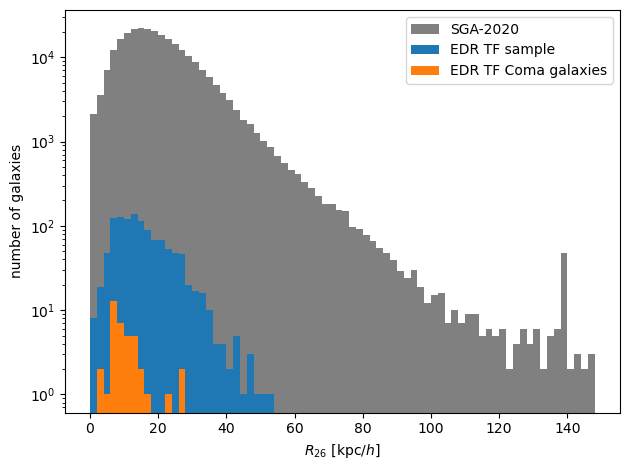

In [55]:
_R26_bins = np.arange(0, 150, 2) # kpc/h

plt.figure(tight_layout=True)

# SGA
plt.hist(SGA['R26_kpc'], bins=_R26_bins, color='gray', label='SGA-2020')

# SV sample
plt.hist(SGA_TF['R26_kpc'], bins=_R26_bins, color='tab:blue', label='EDR TF sample')

# Coma
plt.hist(SGA_TF_clusters['R26_kpc'], bins=_R26_bins, color='tab:orange', label='EDR TF Coma galaxies')

plt.yscale('log')

plt.legend()

plt.xlabel('$R_{26}$ [kpc/$h$]')
plt.ylabel('number of galaxies');

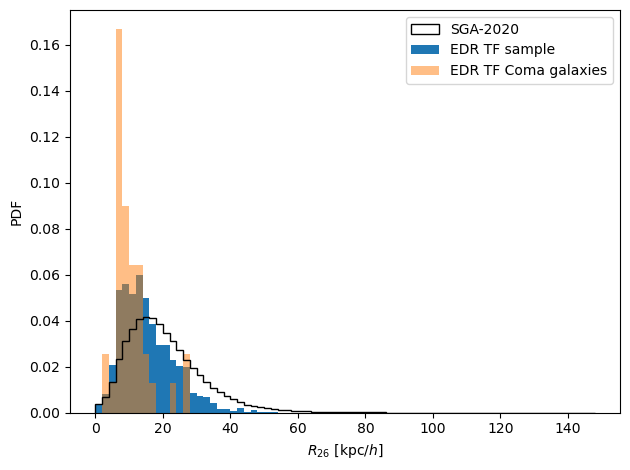

In [53]:
_R26_bins = np.arange(0, 150, 2) # kpc/h

plt.figure(tight_layout=True)

# SGA
plt.hist(SGA['R26_kpc'], bins=_R26_bins, histtype='step', density=True, color='k', label='SGA-2020')

# SV sample
plt.hist(SGA_TF['R26_kpc'], bins=_R26_bins, density=True, color='tab:blue', label='EDR TF sample')

# Coma
plt.hist(SGA_TF_clusters['R26_kpc'], bins=_R26_bins, density=True, alpha=0.5, color='tab:orange', label='EDR TF Coma galaxies')

# plt.yscale('log')

plt.legend()

plt.xlabel('$R_{26}$ [kpc/$h$]')
plt.ylabel('PDF');

### As a function of redshift

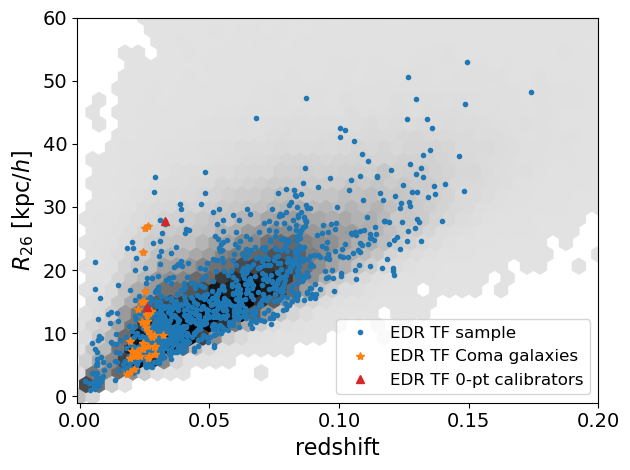

In [82]:
plt.figure(tight_layout=True)

# SGA
plt.hexbin(SGA['Z_LEDA'], SGA['R26_kpc'], 
           mincnt=1, 
           vmin=-500, 
           vmax=2000, 
           extent=(0, 0.2, 0, 150), 
           cmap='Grays', 
           gridsize=(40, 40))

# SV TF sample
plt.plot(SGA_TF['Z_DESI_CMB'], SGA_TF['R26_kpc'], '.', label='EDR TF sample')

# Calibrators
plt.plot(SGA_TF_clusters['Z_DESI_CMB'], SGA_TF_clusters['R26_kpc'], '*', label='EDR TF Coma galaxies')
plt.plot(SGA_TF_0pt['Z_DESI_CMB'], SGA_TF_0pt['R26_kpc'], '^', c='tab:red', label='EDR TF 0-pt calibrators')

plt.xlim(-0.001, 0.2)
plt.ylim(-1, 60)

plt.tick_params('both', which='major', labelsize=14)

plt.legend(fontsize=12)

plt.xlabel('redshift', fontsize=16)
plt.ylabel('$R_{26}$ [kpc/$h$]', fontsize=16);

plt.savefig('../../../figures/SV_papers/fuji_R26kpc_redshift.png', 
            dpi=150, 
            facecolor='none');